In [6]:
import pandas as pd
import matplotlib
import numpy as np
import math
from matplotlib import pyplot as plot

%matplotlib inline

Za projekt pri predmetu Programiranje 1 sem izbrala NBA igralce vseh časov. Liga NBA (National Basketball Association) je najmočnejša košarkarska liga na svetu, v kateri nastopa kar 30 ekip (ena ekipa je kanadska). Ustanovljena je bila leta 1946 v NY.
Podatke sem pridobila iz spletne strani http://en.hispanosnba.com/players/nba-all/index.

V spodnji tabeli je predstavljenih prvih nekaj igralcev (za občutek), njihove igralne pozicije, višina, od katerega do katerega leta so igrali/igrajo v NBA in število igralnih sezon.

In [7]:
podatki = pd.read_csv('players.csv', encoding = "utf-8")
podatki[:20]

,player_name,player_link,position,height,from,to,seasons
0,Alaa Abdelnaby,alaa-abdelnaby,PF/C,2.08,1990,1995,5
1,Zaid Abdul-Aziz,zaid-abdul-aziz,PF/C,2.06,1968,1978,10
2,Mahmoud Abdul-Rauf,mahmoud-abdul-rauf,PG,1.85,1990,2001,9
3,Tariq Abdul-Wahad,tariq-abdul-wahad,SG/SF,1.98,1997,2003,6
4,Shareef Abdur-Rahim,shareef-abdur-rahim,PF,2.06,1996,2008,12
5,Tom Abernethy,tom-abernethy,SF/PF,2.00,1976,1981,5
6,John Abramovic,john-abramovic,SF/PF,1.90,1946,1948,2
7,Álex Abrines,alex-abrines,SG/SF,1.98,2016,2018,1
8,Alex Acker,alex-acker,SG,1.96,2005,2009,2
9,Mark Acres,mark-acres,C/PF,2.11,1987,1993,6


Izračunamo povprečno višino vseh igralcev in jo primerjamo s povprečno višino igralcev, ki igrajo na posameznih pozicijah.

In [8]:
podatki['height'].mean().round(decimals = 2)


1.99

In [9]:
podatki.groupby('position')['height'].mean().round(decimals = 2)

position
C        2.12
C/PF     2.08
PF       2.05
PF/C     2.05
PF/SF    2.04
PG       1.86
PG/SG    1.89
SF       2.00
SF/PF    2.01
SF/SG    1.98
SG       1.94
SG/PG    1.91
SG/SF    1.96
Name: height, dtype: float64

Legenda košarkarskih pozicij:
    -> PG = point guard = organizator 
    -> SG = shooting guard = branilec 
    -> SF = small forward = krilo
    -> PF = power forward = krilni center
    -> C = center = center
    

Povprečna višina centrov (C) pričakovano najbolj (navzgor) odstopa od splošnega povprečja. 
Tudi igralci na poziciji krilnega centra (PF) (oziroma s kombinacijo krilnega centra, tj. _/PF oz PF/_) so v povprečju 
višji od splošne povprečje višine. 
Najnižji so organizatorji igre (PG) in branilci (SG), ti. guardi.
Najbolj blizu povprečja so krilni igralci (SF). Od povprečja se razlikujejo le za 1cm. 

Kot zanimivost pogledamo koliko merita najvišji in najnižji igralec, ki sta kdajkoli igrala v ligi NBA.

In [55]:
podatki['height'].max().round(decimals = 2)

2.3100000000000001

In [11]:
podatki['height'].min().round(decimals = 2)

1.6000000000000001

Izračunamo povprečno število odigranih sezon vseh igralcev in igralcev na posameznih pozicijah.

In [13]:
podatki['seasons'].mean().round(decimals = 2)

5.1600000000000001

In [14]:
podatki.groupby('position')['seasons'].mean().round(decimals = 2)

position
C        5.42
C/PF     6.17
PF       4.84
PF/C     6.13
PF/SF    5.91
PG       5.26
PG/SG    5.10
SF       4.42
SF/PF    4.63
SF/SG    5.37
SG       3.95
SG/PG    4.79
SG/SF    5.86
Name: seasons, dtype: float64

Izračunamo povprečja odigranih sezon igralcev po posameznih desetletji in rezultate prikažemo v grafu.
(V enem desetjetju so upoštevane sezone igralcev, ki so takrat začeli z igranjem v NBA).

In [72]:
seznam = ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
sezone = {}

for i in range(len(seznam)-1):
    ime = 'from{}'.format(seznam[i])
    sezone[ime] = podatki[(podatki['from'] >= seznam[i]) & (podatki['from'] < seznam[i+1])]


    
#preverim če dela
sezone['from2000']['seasons'].mean().round(decimals = 2)


6.0800000000000001

{'from1940': 3.3799999999999999,
 'from1950': 4.3799999999999999,
 'from1960': 5.7999999999999998,
 'from1970': 5.8399999999999999,
 'from1980': 6.9500000000000002,
 'from1990': 6.4699999999999998,
 'from2000': 6.0800000000000001,
 'from2010': 2.3399999999999999}

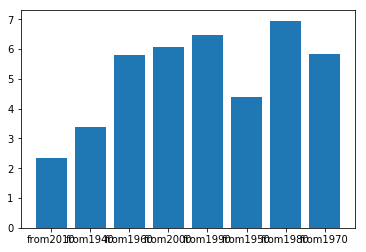

In [94]:
povprecje_sezon = {}
pari = []


for element in sezone:
    ime = '{}'.format(element)
    povprecje_sezon[ime] = sezone[element]['seasons'].mean().round(decimals = 2)
    

x = []
y = []

#v seznamih x in y bosta podatka za isto obdobje na istem mestu, le da seznama ne bosta urejena po vrsti po letih!

for element in povprecje_sezon:
    x.append(element)
    y.append(povprecje_sezon[element])
    

for i in range (len(x)):
    pari.append((x[i], y[i]))
    pari.sort()

    

graf = plot.bar(range(len(povprecje_sezon)), list(povprecje_sezon.values()))
plot.xticks(range(len(povprecje_sezon)), list(povprecje_sezon.keys()))

povprecje_sezon

Vidimo, da se povprečje odigranih sezon z desetletji praviloma viša.
Najnižje povprečje igranih sezon je sicer med 2010 in 2020, a ta podatek seveda ni relevanten, saj večina teh igralcev še zdaleč ni zaključila s svojo NBA kariero. 
                                                    
    